In [4]:
import pandas as pd

# 파일 경로 지정
apply_train_path = 'C:/Users/82106/Desktop/국민대 이력서 공모전/open/apply_train.csv'
company_path = 'C:/Users/82106/Desktop/국민대 이력서 공모전/open/company.csv'
recruitment_path = 'C:/Users/82106/Desktop/국민대 이력서 공모전/open/recruitment.csv'
resume_path = 'C:/Users/82106/Desktop/국민대 이력서 공모전/open/resume.csv'
resume_certificate_path = 'C:/Users/82106/Desktop/국민대 이력서 공모전/open/resume_certificate.csv'
resume_education_path = 'C:/Users/82106/Desktop/국민대 이력서 공모전/open/resume_education.csv'
resume_language_path = 'C:/Users/82106/Desktop/국민대 이력서 공모전/open/resume_language.csv'

# 각 파일을 데이터프레임으로 불러오기
apply_train_df = pd.read_csv(apply_train_path)
company_df = pd.read_csv(company_path)
recruitment_df = pd.read_csv(recruitment_path)
resume_df = pd.read_csv(resume_path)
resume_certificate_df = pd.read_csv(resume_certificate_path)
resume_education_df = pd.read_csv(resume_education_path)
resume_language_df = pd.read_csv(resume_language_path)

# 각 데이터프레임의 처음 5행 출력
(apply_train_df.head(), 
 company_df.head(), 
 recruitment_df.head(), 
 resume_df.head(), 
 resume_certificate_df.head(), 
 resume_education_df.head(), 
 resume_language_df.head())

(  resume_seq recruitment_seq
 0     U05833          R03838
 1     U06456          R02144
 2     U07807          R01877
 3     U04842          R02463
 4     U08336          R00112,
   recruitment_seq  company_type_seq  supply_kind  employee
 0          R02073                 2          514        20
 1          R03274                 2          402        90
 2          R02195                 2          514        20
 3          R03372                 4          100        60
 4          R00867                 2          402       590,
   recruitment_seq  address_seq1  address_seq2  address_seq3  career_end  \
 0          R02264           3.0           NaN           NaN           0   
 1          R06317           3.0           NaN           NaN           0   
 2          R04017           3.0           NaN           NaN           0   
 3          R02865           3.0           NaN           NaN           0   
 4          R04890           3.0           NaN           NaN           0   
 


In [5]:
# 각 파일에 대한 기본 통계 정보와 결측치 수 확인
basic_stats = {}
missing_values = {}

for name, path in files.items():
    # 데이터 로드
    df = pd.read_csv(path)

    # 기본 통계 정보
    basic_stats[name] = df.describe(include='all')

    # 결측치 수
    missing_values[name] = df.isnull().sum()

# 기본 통계 정보와 결측치 수의 일부를 확인
basic_stats.keys(), basic_stats['apply_train'].head(), missing_values['apply_train']


(dict_keys(['apply_train', 'company', 'recruitment', 'resume', 'resume_certificate', 'resume_education', 'resume_language']),
        resume_seq recruitment_seq
 count       57946           57946
 unique       8482            6695
 top        U06543          R03237
 freq           77              78,
 resume_seq         0
 recruitment_seq    0
 dtype: int64)

In [6]:
# 나머지 파일들의 기본 통계 정보와 결측치 수 확인
basic_stats_rest = {}
missing_values_rest = {}

for name in files.keys():
    if name != 'apply_train':
        # 데이터 로드
        df = pd.read_csv(files[name])

        # 기본 통계 정보
        basic_stats_rest[name] = df.describe(include='all')

        # 결측치 수
        missing_values_rest[name] = df.isnull().sum()

# 기본 통계 정보와 결측치 수의 일부를 확인
basic_stats_rest.keys(), basic_stats_rest['company'].head(), missing_values_rest['company']


(dict_keys(['company', 'recruitment', 'resume', 'resume_certificate', 'resume_education', 'resume_language']),
        recruitment_seq  company_type_seq  supply_kind     employee
 count             2377       2377.000000  2377.000000  2377.000000
 unique            2377               NaN          NaN          NaN
 top             R02073               NaN          NaN          NaN
 freq                 1               NaN          NaN          NaN
 mean               NaN          2.944468   344.090029   217.696676,
 recruitment_seq     0
 company_type_seq    0
 supply_kind         0
 employee            0
 dtype: int64)

In [7]:
# 나머지 파일들의 기본 통계 정보와 결측치 수의 일부를 확인
basic_stats_summary = {name: basic_stats_rest[name].head() for name in basic_stats_rest}
missing_values_summary = {name: missing_values_rest[name] for name in missing_values_rest}

# 요약 정보 출력
basic_stats_summary, missing_values_summary


({'company':        recruitment_seq  company_type_seq  supply_kind     employee
  count             2377       2377.000000  2377.000000  2377.000000
  unique            2377               NaN          NaN          NaN
  top             R02073               NaN          NaN          NaN
  freq                 1               NaN          NaN          NaN
  mean               NaN          2.944468   344.090029   217.696676,
  'recruitment':        recruitment_seq  address_seq1  address_seq2  address_seq3  career_end  \
  count             6695   6694.000000         100.0      9.000000      6695.0   
  unique            6695           NaN           NaN           NaN         NaN   
  top             R02264           NaN           NaN           NaN         NaN   
  freq                 1           NaN           NaN           NaN         NaN   
  mean               NaN      3.103675           7.9     16.555556         0.0   
  
          career_start check_box_keyword    education   major_ta

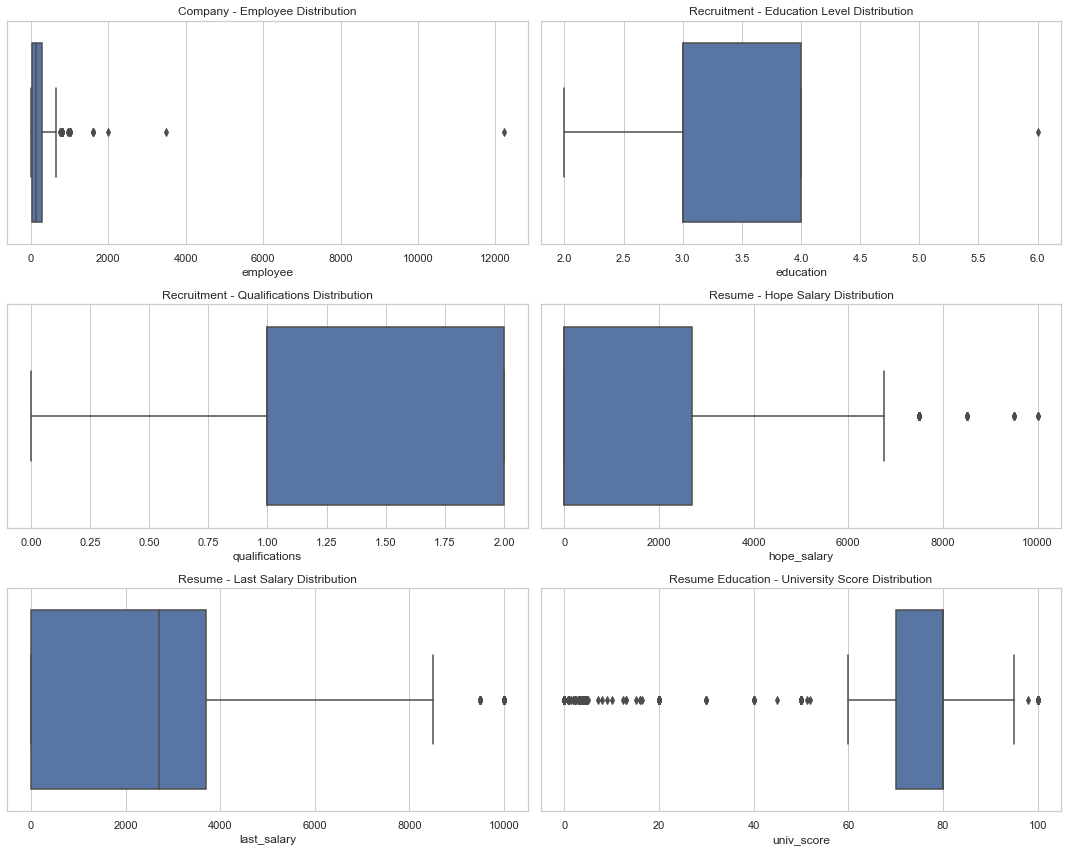

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set(style="whitegrid")

# 박스플롯 그리기
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# company.csv의 employee
sns.boxplot(ax=axes[0, 0], data=company_df, x='employee')
axes[0, 0].set_title('Company - Employee Distribution')

# recruitment.csv의 education 및 qualifications
sns.boxplot(ax=axes[0, 1], data=recruitment_df, x='education')
axes[0, 1].set_title('Recruitment - Education Level Distribution')

sns.boxplot(ax=axes[1, 0], data=recruitment_df, x='qualifications')
axes[1, 0].set_title('Recruitment - Qualifications Distribution')

# resume.csv의 hope_salary 및 last_salary
sns.boxplot(ax=axes[1, 1], data=resume_df, x='hope_salary')
axes[1, 1].set_title('Resume - Hope Salary Distribution')

sns.boxplot(ax=axes[2, 0], data=resume_df, x='last_salary')
axes[2, 0].set_title('Resume - Last Salary Distribution')

# resume_education.csv의 univ_score
sns.boxplot(ax=axes[2, 1], data=resume_education_df, x='univ_score')
axes[2, 1].set_title('Resume Education - University Score Distribution')

plt.tight_layout()
plt.show()


In [13]:
# 각 데이터셋의 수치형 칼럼 확인
numeric_columns = {
    "company": company_df.select_dtypes(include='number').columns.tolist(),
    "recruitment": recruitment_df.select_dtypes(include='number').columns.tolist(),
    "resume": resume_df.select_dtypes(include='number').columns.tolist(),
    "resume_certificate": resume_certificate_df.select_dtypes(include='number').columns.tolist(),
    "resume_education": resume_education_df.select_dtypes(include='number').columns.tolist(),
    "resume_language": resume_language_df.select_dtypes(include='number').columns.tolist(),
}

numeric_columns


{'company': ['company_type_seq', 'supply_kind', 'employee'],
 'recruitment': ['address_seq1',
  'address_seq2',
  'address_seq3',
  'career_end',
  'career_start',
  'education',
  'major_task',
  'qualifications'],
 'resume': ['degree',
  'graduate_date',
  'hope_salary',
  'last_salary',
  'career_month'],
 'resume_certificate': [],
 'resume_education': ['hischool_type_seq',
  'hischool_location_seq',
  'univ_type_seq1',
  'univ_type_seq2',
  'univ_transfer',
  'univ_location',
  'univ_major_type',
  'univ_score'],
 'resume_language': ['language', 'exam_name', 'score']}

In [14]:
# resume.csv와 recruitment.csv 데이터셋의 공통 칼럼 확인
common_columns = set(resume_df.columns).intersection(set(recruitment_df.columns))
common_columns


{'text_keyword'}

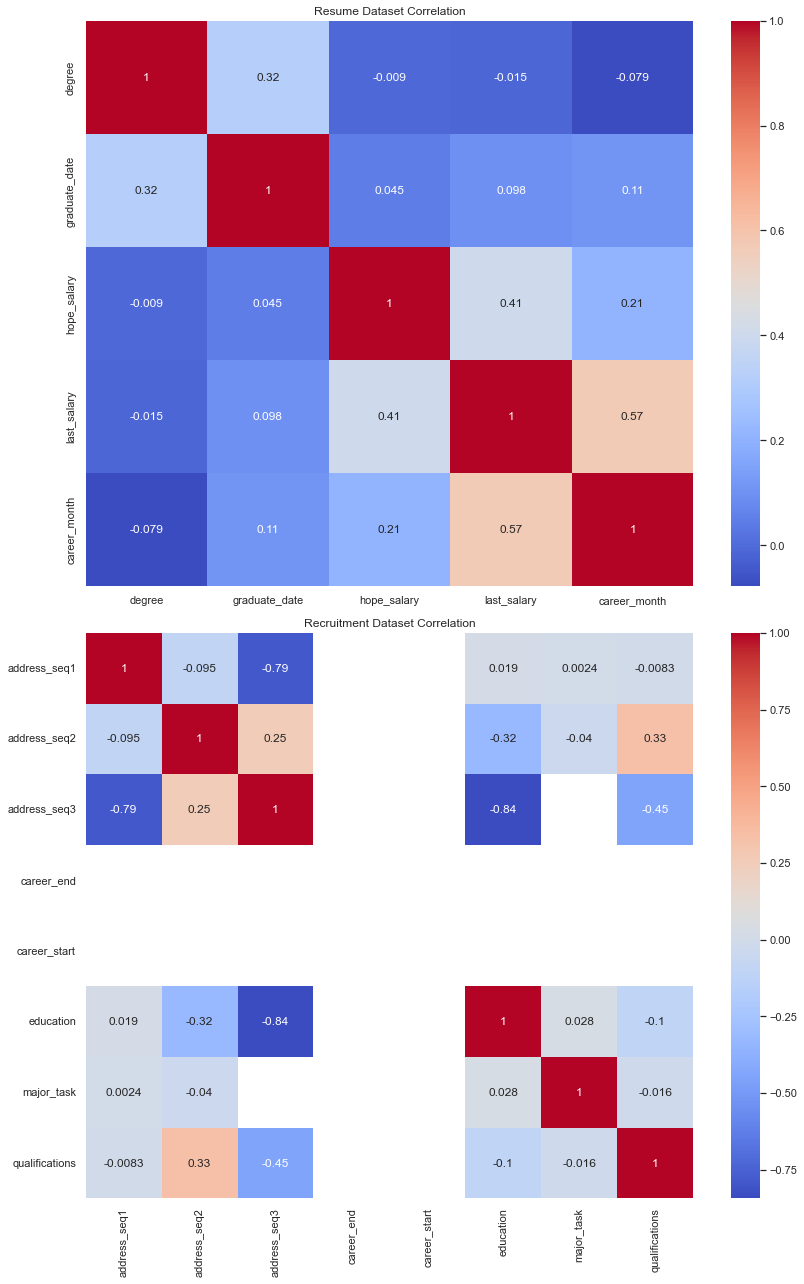

In [22]:
# 각 데이터셋 내의 수치형 칼럼들 간의 상관관계 분석

# resume.csv 데이터셋의 상관관계 분석
resume_corr = resume_df[numeric_columns['resume']].corr()

# recruitment.csv 데이터셋의 상관관계 분석
recruitment_corr = recruitment_df[numeric_columns['recruitment']].corr()

# 히트맵으로 상관관계 시각화
fig, axes = plt.subplots(2, 1, figsize=(12, 18))

# resume.csv의 상관관계 히트맵
sns.heatmap(resume_corr, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Resume Dataset Correlation')

# recruitment.csv의 상관관계 히트맵
sns.heatmap(recruitment_corr, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Recruitment Dataset Correlation')

plt.tight_layout()
plt.show()


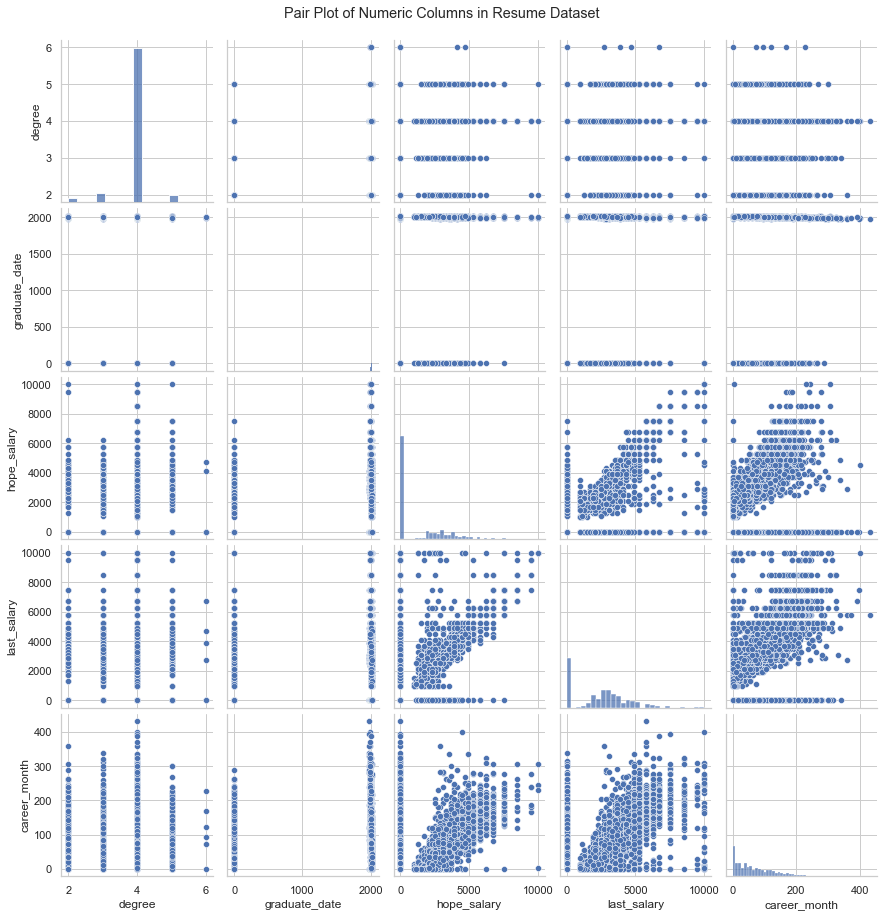

In [23]:
# resume.csv 데이터셋을 사용하여 페어 플롯 생성
sns.pairplot(resume_df[numeric_columns['resume']])
plt.suptitle('Pair Plot of Numeric Columns in Resume Dataset', y=1.02)  # 제목 추가 및 위치 조정
plt.show()


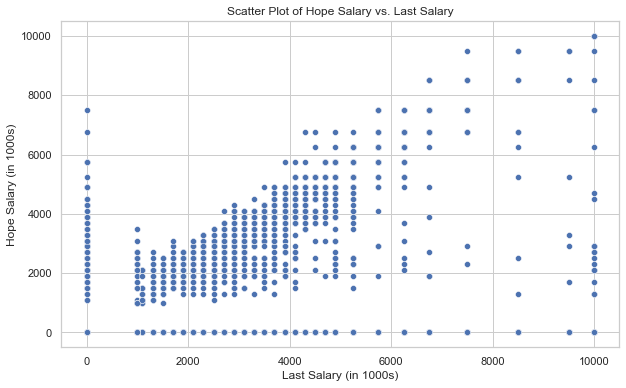

In [24]:
# resume.csv 데이터셋에서 hope_salary와 last_salary의 산점도 다시 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resume_df, x='last_salary', y='hope_salary')
plt.title('Scatter Plot of Hope Salary vs. Last Salary')
plt.xlabel('Last Salary (in 1000s)')
plt.ylabel('Hope Salary (in 1000s)')
plt.show()
